In [50]:
# Import required libraries

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [51]:
# Useful functions 

def plot(img1, img2, img3):
    f, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15,15))
    axis1.axis('off')
    axis2.axis('off')
    axis3.axis('off')
    axis1.imshow(img1, cmap='Greys_r')
    axis2.imshow(img2, cmap='Greys_r')
    axis3.imshow(img3, cmap='Greys_r')

Image dimensions are: (530, 1162, 3)


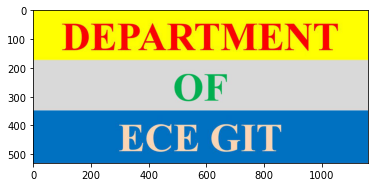

In [52]:
# Read & Display input image

ip_img = mpimg.imread('serb1.jpg')
print(f"Image dimensions are: {ip_img.shape}")
plt.imshow(ip_img)

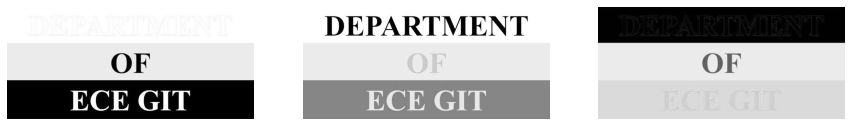

In [53]:
# split image in RGB color space

r = ip_img[:,:,0]
g = ip_img[:,:,1]
b = ip_img[:,:,2]
plot(r, g, b)

In [54]:
### r amd g channels look better

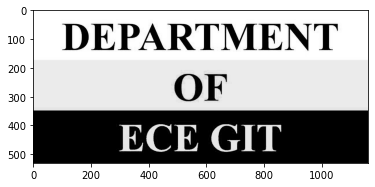

In [55]:
# bitwise anding r and g 

out_img = cv2.bitwise_and(r, g)
plt.imshow(out_img, cmap='Greys_r')

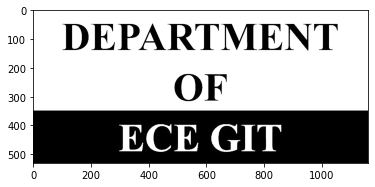

In [56]:
# Blacks are looking perfect black, make gray pixels to perfect white

out_img [out_img > 128 ] = 255
plt.imshow(out_img, cmap='Greys_r')

In [57]:
## 
## Looks like first two strips are done, only need to work on 3rd strip
##

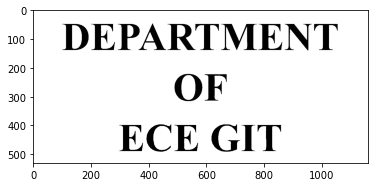

In [58]:
# create a mask selecting all white and one more with all black pixels

mask_ece_git = out_img > 128       # selects all pixels with intensity > 128 
mask_all_black = out_img <= 128    # same as   mask_all_black = ~mask_ece_git

# de-select pixels in first two strips
y, x = out_img.shape
y_last_strip = int(y/3 * 2) - 5

mask_ece_git[0:y_last_strip,:] = 0
mask_all_black[0:y_last_strip,:] = 0

# set ECE GIT to black
out_img[mask_ece_git] = 0

# set rest of black pixels to white
out_img[mask_all_black] = 255
plt.imshow(out_img, cmap='Greys_r')